# Assignment 2: **Machine learning with tree based models** 

In this assignment, you will work on the **Titanic** dataset and use machine learning to create a model that predicts which passengers survived the **Titanic** shipwreck. 

---
## About the dataset:
---
* The column named  `Survived` is the label and the remaining columns are features. 
* The features can be described as given below:
  <table>
  <thead>
    <tr>
      <th>Variable</th>
      <th>Definition </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>pclass</td>
      <td>Ticket class	</td>
    </tr>
    <tr>
      <td>SibSp</td>
      <td>Number of siblings / spouses aboard the Titanic</td>
    </tr>
    <tr>
      <td>Parch</td>
      <td>Number of parents / children aboard the Titanic</td>
    </tr>
    <tr>
      <td>Ticket</td>
      <td>Ticket number</td>
    </tr>
    <tr>
      <td>Embarked</td>
      <td>Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton</td>
    </tr>
  </tbody>
</table> 	

---
## Instructions
---
* Apply suitable data pre-processing techniques, if needed. 
* Implement a few classifiers to create your model and compare the performance metrics by plotting the curves like roc_auc, confusion matrix, etc. 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier, RandomForestRegressor, RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder

In [3]:
titanic_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L2/titanic.csv"
titanic_data = pd.read_csv(titanic_url)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.shape

(891, 12)

In [5]:
print(titanic_data.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
titanic_data = titanic_data.dropna(subset = ['Embarked'])
titanic_data = titanic_data.drop(['Cabin'], axis = 1)
print(titanic_data.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64


In [0]:
titanic_data = titanic_data.fillna(titanic_data.mean())

In [0]:
# extracting labels for data
y = titanic_data['Survived']
# dropping columns by observing histograms and heatmap
X = titanic_data.drop(['Survived', 'PassengerId', 'Name', 'Ticket'], axis = 1)

In [9]:
print(X.isna().sum())

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [0]:
label_encoder = LabelEncoder() 
X['Sex'] = label_encoder.fit_transform(X['Sex']) 

In [11]:
X = pd.get_dummies(X, columns = ['Embarked'], drop_first = True)
X.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,0,1
1,1,0,38.0,1,0,71.2833,0,0
2,3,0,26.0,0,0,7.9250,0,1


In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      889 non-null    int64  
 1   Sex         889 non-null    int64  
 2   Age         889 non-null    float64
 3   SibSp       889 non-null    int64  
 4   Parch       889 non-null    int64  
 5   Fare        889 non-null    float64
 6   Embarked_Q  889 non-null    uint8  
 7   Embarked_S  889 non-null    uint8  
dtypes: float64(2), int64(4), uint8(2)
memory usage: 50.4 KB


<Figure size 432x288 with 0 Axes>

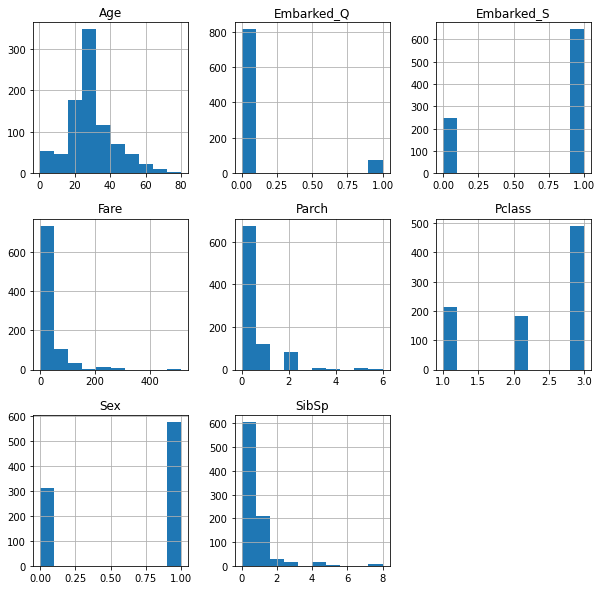

<Figure size 432x288 with 0 Axes>

In [13]:
X.hist(figsize = (10,10))
plt.figure()

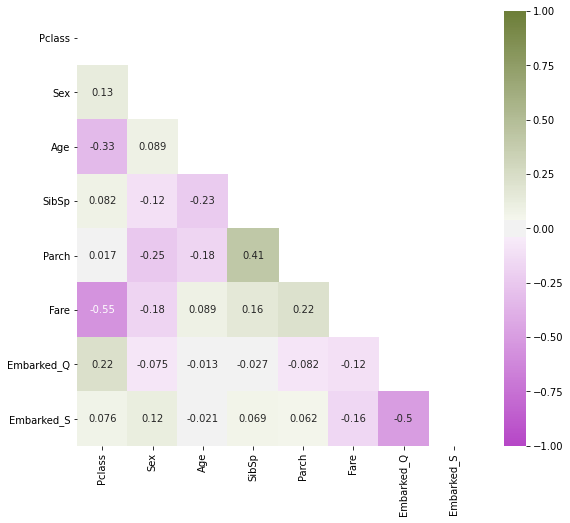

In [14]:
plt.figure(figsize=(9,8))
mask = np.zeros_like(X.corr(), dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(X.corr(), 
            vmin = -1,
            cmap = sns.diverging_palette(300, 100, as_cmap=True),
            annot = True,
            mask = mask)

plt.show()

In [0]:
# Split data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 2)

# **Random Forest**

In [0]:
# Defining the classifier 
estimator = RandomForestClassifier(random_state = 0)
parameters = {
    'max_depth': range (2, 6, 1),
    'n_estimators': range(30, 140, 10),
    'criterion': ['gini', 'entropy']
}

In [0]:
# Instantiating the grid search 
grid_search = GridSearchCV(
    estimator = estimator,
    param_grid = parameters,
    scoring = 'roc_auc',
    n_jobs = -1,
    cv = 10,
    verbose = True
)

In [18]:
# Fitting the grid search 
grid_search.fit(X_train, y_train)
grid_search.best_params_, grid_search.best_score_

Fitting 10 folds for each of 88 candidates, totalling 880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:   47.0s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 880 out of 880 | elapsed:  1.5min finished


({'criterion': 'gini', 'max_depth': 4, 'n_estimators': 110},
 0.8677757485966868)

In [19]:
rf = RandomForestClassifier(max_depth = 5, criterion = 'gini', n_estimators = 100, random_state = 0)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [20]:
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

conf_mat_rf = confusion_matrix(y_test, y_pred_rf)

y_prob_rf = rf.predict_proba(X_test)[:,1]
roc_auc_score_rf = roc_auc_score(y_test, y_prob_rf)


print('Accuracy:', accuracy_rf)

print('Confusion Matrix:\n', conf_mat_rf)

print('ROC AUC score:', roc_auc_score_rf)

Accuracy: 0.8277153558052435
Confusion Matrix:
 [[154  11]
 [ 35  67]]
ROC AUC score: 0.862893642305407


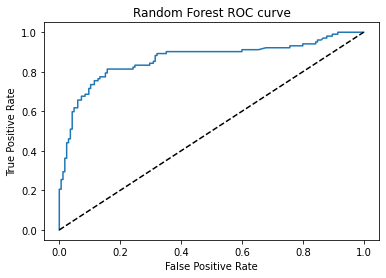

In [21]:
fper, tper, thresholds = roc_curve(y_test, y_prob_rf) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC curve')
plt.show()

# **Bagging**

In [0]:
# Defining the classifier 
dt = DecisionTreeClassifier(random_state = 2)
estimator = BaggingClassifier(base_estimator = dt, random_state = 2)

parameters = {
    'base_estimator__max_depth': range(2, 8, 1),
    'base_estimator__criterion': ['gini', 'entropy'],
    'n_estimators': range(20, 200, 20),
}

In [0]:
# Instantiating the grid search 
grid_search = GridSearchCV(
    estimator = estimator,
    param_grid = parameters,
    scoring = 'roc_auc',
    n_jobs = -1,
    cv = 10,
    verbose = True
)

In [24]:
# Fitting the grid search 
grid_search.fit(X_train, y_train)
grid_search.best_params_, grid_search.best_score_

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 254 tasks      | elapsed:   33.3s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 854 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  2.7min finished


({'base_estimator__criterion': 'gini',
  'base_estimator__max_depth': 6,
  'n_estimators': 100},
 0.8634848251481546)

In [25]:
dt = DecisionTreeClassifier(max_depth = 7, random_state = 2, criterion = 'gini')
bc = BaggingClassifier(base_estimator = dt, n_estimators = 100, n_jobs = -1) 
bc.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=7,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=2,
      

In [26]:
y_pred_bc = bc.predict(X_test)
accuracy_bc = accuracy_score(y_test, y_pred_bc)

conf_mat_bc = confusion_matrix(y_test, y_pred_bc)

y_prob_bc = bc.predict_proba(X_test)[:,1]
roc_auc_score_bc = roc_auc_score(y_test, y_prob_bc)


print('Accuracy:', accuracy_bc)

print('Confusion Matrix:\n', conf_mat_bc)

print('ROC AUC score:', roc_auc_score_bc)

Accuracy: 0.8164794007490637
Confusion Matrix:
 [[152  13]
 [ 36  66]]
ROC AUC score: 0.88116458704694


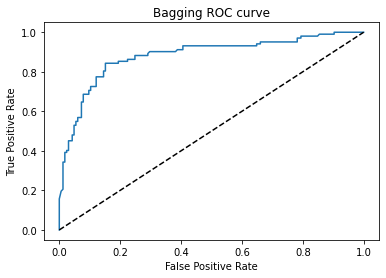

In [27]:
fper, tper, thresholds = roc_curve(y_test, y_prob_bc) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Bagging ROC curve')
plt.show()

# **Boosting**

In [0]:
# Defining the classifier
dt = DecisionTreeClassifier(random_state = 5)
estimator = AdaBoostClassifier(base_estimator = dt, random_state = 5)

parameters = {
    'base_estimator__max_depth': range(2, 7, 1),
    'n_estimators': range(20, 150, 20),
    'learning_rate': [0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

In [0]:
# Instantiating the grid search 
grid_search = GridSearchCV(
    estimator = estimator,
    param_grid = parameters,
    scoring = 'roc_auc',
    n_jobs = -1,
    cv = 10,
    verbose = True
)

In [30]:
# Fitting the grid search 
grid_search.fit(X_train, y_train)
grid_search.best_params_, grid_search.best_score_

Fitting 10 folds for each of 140 candidates, totalling 1400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 254 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:   55.9s
[Parallel(n_jobs=-1)]: Done 854 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1304 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1400 out of 1400 | elapsed:  3.1min finished


({'algorithm': 'SAMME',
  'base_estimator__max_depth': 2,
  'learning_rate': 0.5,
  'n_estimators': 40},
 0.8672988910403099)

In [31]:
dt = DecisionTreeClassifier(max_depth = 2, criterion = 'gini', random_state = 5)
adb = AdaBoostClassifier(base_estimator = dt, n_estimators = 130, learning_rate = 0.5, algorithm = 'SAMME', random_state = 5)
adb.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                            

In [32]:
y_pred_adb = adb.predict(X_test)
accuracy_adb = accuracy_score(y_test, y_pred_adb)

conf_mat_adb = confusion_matrix(y_test, y_pred_adb)

y_prob_adb = adb.predict_proba(X_test)[:,1]
roc_auc_score_adb = roc_auc_score(y_test, y_prob_adb)


print('Accuracy:', accuracy_adb)

print('Confusion Matrix:\n', conf_mat_adb)

print('ROC AUC score:', roc_auc_score_adb)



Accuracy: 0.8202247191011236
Confusion Matrix:
 [[142  23]
 [ 25  77]]
ROC AUC score: 0.8538918597742127


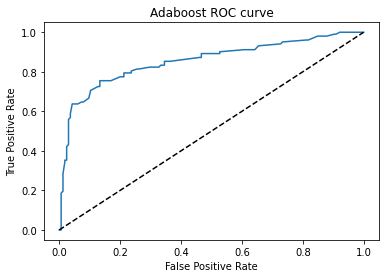

In [33]:
fper, tper, thresholds = roc_curve(y_test, y_prob_adb) 
plt.plot(fper, tper)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Adaboost ROC curve')
plt.show()

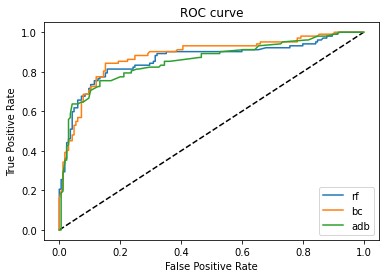

In [34]:
fper_rf, tper_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
fper_bc, tper_bc, thresholds_bc = roc_curve(y_test, y_prob_bc)
fper_adb, tper_adb, thresholds_adb = roc_curve(y_test, y_prob_adb)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fper_rf, tper_rf, label = 'rf')
plt.plot(fper_bc, tper_bc, label = 'bc')
plt.plot(fper_adb, tper_adb, label = 'adb')

plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

# **Result**
If we see overall performance then Bagging is performing better with 
Accuracy: 0.8164
and
ROC AUC score: 0.8811
